<div class="usecase-title">Availability of Support Services and Its Impact on Wellbeing Indicators in Melbourne (Focusing on Food Services)</div>

<div class="usecase-authors"><b>Authored by: </b>Katrine Chan</div>

<div class="usecase-duration"><b>Duration:</b> 90 mins</div>

<div class="usecase-level-skill">
    <div class="usecase-level"><b>Level: </b>Intermediate</div>
    <div class="usecase-skill"><b>Pre-requisite Skills: </b>Python </div>
</div>

<div class="usecase-section-header"><i><b>User Story</i></b></div>

The City of Melbourne has recognized the critical role that the availability of support services plays in promoting personal wellbeing and social connection within the community. In recent years, there has been a growing need to understand how free and low-cost support services, particularly food services, are distributed across the city and their impact on wellbeing indicators. Food support, being a fundamental necessity, is essential for maintaining physical health, mental wellbeing, and a sense of security.

To ensure that all residents have reliable access to nutritious and sufficient food, regardless of their circumstances, Melbourne is focusing on analyzing the spatial distribution of food services. By examining how the availability of these services influences wellbeing indicators, the city aims to strengthen food security and enhance the overall quality of life for its residents. This initiative is crucial for preventing food insecurity, which can lead to negative outcomes such as poor health, social isolation, and increased stress, ensuring that no one in Melbourne goes hungry and that everyone feels secure about their access to food.

<div class="usecase-section-header"><i><b>Scenario</i></b></div>

As a Community Planner at the City of Melbourne, I aim to understand the availability and impact of food support services on personal wellbeing within the community. This analysis will help uncover any gaps in service provision that may affect the community's sense of food security, enabling me to make informed decisions that enhance service delivery and improve overall community wellbeing.

At the end of this use case you will:
* Have gained an understanding of using APIs
* Have learned how to fetch datasets using APIs from Melbourne Open Data Database 
* Become familiar with performing data pre-processing
* Learned how to visualise real-life data using appropriate visualisation tools
* Learned how to work with more than one dataset


<div class="usecase-section-header"><i><b>Introduction</i></b></div>

To complete this analysis, two datasets will be used.  These datasets will include below: 

* Indicators of wellbeing by year (Future Melbourne)
This data collects data annually on the personal wellbeing, social connection, self-reported health, volunteering behaviour, food security, acceptance of diverse cultures; engagement in decision making and arts and cultural activities of residents in Melbourne Local Government Area of 400 respondents.

* Free and cheap support services, with opening hours, public transport and parking options (Helping Out)
The City of Melbourne's Helping Out booklet provides a list of free and cheap support services available from more than 70 organisations. The list includes food, accommodation, health services, drug and alcohol services, and legal advice.

# Table of Contents

* [Part 1 - Importing Required Modules](#part1)
* [Part 2 - Retrieving Helping Out Data Set](#part2)
* [Part 3 - Understanding and Pre-Processing Future Melbourne Dataset fm_df](#part3)
* [Part 4 - Exploratory Data Analysis fm_df](#part4)
* [Part 5 - Retrieving Helping Out Data Set](#part5)
* [Part 6 - Understanding and Pre-Processing Helping Out Dataset ho_df](#part6)
* [Part 7 - Exploratory Data Analysis ho_df](#part7)
* [Part 8 - Food Services Available in Melbourne City and Exploring Indicator Relating to Food Security](#part8)
* [Part 9 - Conclusion](#part9)
* [Part 10 - Limitation of this Analysis](#part10)
* [Part 11 - Reference](#part11)




<p style="font-weight: bold; font-size: 1.2em;"><a calss="anchor" id="part1">Part 1 - Importing Required Modules</p> </a>

In [1]:
# importing required modules to complete this analysis

import requests 
import pandas as pd 
import numpy as np 
from io import StringIO 

import matplotlib.pyplot as plt 
from wordcloud import WordCloud 

import folium
from folium.plugins import MousePosition
from ipywidgets import interact, widgets
from IPython.display import display

import warnings

from statsmodels.tsa.arima.model import ARIMA
import itertools 
from itertools import product
from sklearn.metrics import mean_absolute_error, mean_squared_error

<p style="font-weight: bold; font-size: 1.2em;"><a calss="anchor" id="part2">Part 2 - Retrieving Future Melbourne Data Set</p></a>

In [2]:
# https://data.melbourne.vic.gov.au/explore/dataset/indicators-of-wellbeing-by-year-future-melbourne/information/
dataset_id = 'indicators-of-wellbeing-by-year-future-melbourne'

base_url = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
# apikey = ''
dataset_id = dataset_id
format = 'csv'

url = f'{base_url}{dataset_id}/exports/{format}'
params = {
    'select': '*',
    'limit': -1, # all records
    'lang': 'en',
    'timezone': 'UTC'
    #'api_key': apikey
}

#GET request 
response = requests.get(url, params = params)

if response.status_code == 200:
    # StringIO to read the CSV data
    url_content = response.content.decode('utf-8')
    fm_df = pd.read_csv(StringIO(url_content), delimiter= ';')
else: 
    print(f'Request failed with status code{response.status_code}')

In [3]:
# printing out the first 5 lines of Future Melbourne Data set fm_df
fm_df.head(5)

,indicator_label,indicator_description,unit,2012,2013,2014,2015,2016,population,source
0,Quality of life,Personal subjective wellbeing Index (average o...,%,75.6,76.7,76.8,76.9,76.5,Resident,Future Melbourne Social Survey
1,Quality of life (Male),Personal subjective wellbeing Index (average o...,%,75.6,76.7,77.4,76.6,75.9,Resident,Future Melbourne Social Survey
2,Quality of life (18-35 yrs),Personal subjective wellbeing Index (average o...,%,75.6,74.9,76.9,76.1,76.3,Resident,Future Melbourne Social Survey
3,Quality of life (36 yrs and over),Personal subjective wellbeing Index (average o...,%,75.5,78.3,76.8,77.6,76.6,Resident,Future Melbourne Social Survey
4,Personal relationships,How satisfied people feel with their personal ...,%,77.0,79.8,80.0,78.9,79.5,Resident,Future Melbourne Social Survey


<p style="font-weight: bold; font-size: 1.2em;"><a calss="anchor" id="part3">Part 3 - Understanding and Pre-Processing Future Melbourne Data Set</p></a>

In [4]:
# Understanding the shape of fm_df
num_rows, num_columns = fm_df.shape

print(f'The Future Melbourne Dataset has {num_rows} rows and {num_columns} columns.')

The Future Melbourne Dataset has 88 rows and 10 columns.


In [5]:
# Displaying Summary information of fm_df dataframe
fm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   indicator_label        88 non-null     object 
 1   indicator_description  88 non-null     object 
 2   unit                   88 non-null     object 
 3   2012                   65 non-null     float64
 4   2013                   65 non-null     float64
 5   2014                   88 non-null     float64
 6   2015                   88 non-null     float64
 7   2016                   88 non-null     float64
 8   population             88 non-null     object 
 9   source                 88 non-null     object 
dtypes: float64(5), object(5)
memory usage: 7.0+ KB


There are 23 observations with NA values in both 2012 and 2013.  

In [6]:
# As there are observations which are NAs, it is important to understand what these are and how these may impact the analysis

# Displaying observations with any Na values and understanding what they are 
fm_na = fm_df[fm_df.isna().any(axis=1)]

fm_na

,indicator_label,indicator_description,unit,2012,2013,2014,2015,2016,population,source
12,Perceptions of safety - daytime,People Who Feel Safe or Very Safe in public sp...,%,NaN,NaN,96.3,97.1,90.3,City users,Council Plan Intercept Social Survey
13,Perceptions of safety - daytime (Male),People Who Feel Safe or Very Safe in public sp...,%,NaN,NaN,94.9,98.1,91.5,City users,Council Plan Intercept Social Survey
14,Perceptions of safety - daytime (40 yrs and over),People Who Feel Safe or Very Safe in public sp...,%,NaN,NaN,95.4,96.5,89.7,City users,Council Plan Intercept Social Survey
15,Perceptions of safety - night time,People Who Feel Safe or Very Safe in public sp...,%,NaN,NaN,56.7,62.1,69.9,City users,Council Plan Intercept Social Survey
16,Perceptions of safety - night time (40 yrs and...,People Who Feel Safe or Very Safe in public sp...,%,NaN,NaN,57.6,61.1,78.6,City users,Council Plan Intercept Social Survey
30,Food Growing (Female),"People who grow herbs, fruits or vegetables",%,NaN,NaN,59.0,46.5,55.5,Residents,Future Melbourne Social Survey
31,Food Growing (18-35 yrs),"People who grow herbs, fruits or vegetables",%,NaN,NaN,45.0,38.4,36.4,Residents,Future Melbourne Social Survey
32,Food Producing,People who produce some of their own food (gro...,%,NaN,NaN,59.8,58.3,54.8,Residents,Future Melbourne Social Survey
41,Perceptions of safety - daytime (18-39 yrs),People Who Feel Safe or Very Safe in public sp...,%,NaN,NaN,97.4,98.1,90.7,City users,Council Plan Intercept Social Survey
42,Perceptions of safety - night time (18-39 yrs),People Who Feel Safe or Very Safe in public sp...,%,NaN,NaN,55.0,63.7,65.1,City users,Council Plan Intercept Social Survey


These rows are missing records for year 2012 and 2013. Despite these being NA, these will be kept as these observations could still be important for our analysis. 

<p style="font-weight: bold; font-size: 1.2em;"><a calss="anchor" id="part4">Part 4 - Exploratory Data Analysis of fm_df</p></a>

In [7]:
# Creating an interactive plot, so plot will update according to the indicator selected by the user from the dropdown

# Function to plot the observations
def plot_trend(indicator_label):
    
    # Pick up the row selected by the user
    selected_data = fm_df[fm_df['indicator_label'] == indicator_label] 
    
    if not selected_data.empty:  # Checking to enusre selected data is not empty
        years = ['2012', '2013', '2014', '2015', '2016']
        values = selected_data[years].values[0]
        
        # Plot is then created 
        plt.figure(figsize=(10, 6))
        plt.plot(years, values, marker='o')
        plt.title(f'Trend for {indicator_label}')
        plt.xlabel('Year')
        plt.ylabel('Percentage')
        plt.grid(True)
        plt.show()
    else:
        print(f"No data available for {indicator_label}")

# Create the dropdown widget, allowing user to pick an indicator.  Options in the drop down are unique values from the indicator_label column 
indicator_dropdown = widgets.Dropdown(
    options=fm_df['indicator_label'].unique(),
    description='Indicator:')

# Use interact to create the interactive plot, linking a function and a widget
interact(plot_trend, indicator_label=indicator_dropdown)


interactive(children=(Dropdown(description='Indicator:', options=('Quality of life', 'Quality of life (Male)',…

<function __main__.plot_trend(indicator_label)>

<p style="font-weight: bold; font-size: 1.2em;"><a calss="anchor" id="part5">Part 5 - Retrieving Helping Out Data Set</p></a>



In [8]:
# Retrieving Helping Out Data Set from Melbourne Open Data

# https://data.melbourne.vic.gov.au/explore/dataset/free-and-cheap-support-services-with-opening-hours-public-transport-and-parking-/information/
dataset_id = 'free-and-cheap-support-services-with-opening-hours-public-transport-and-parking-'

base_url = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
# apikey = ''
dataset_id = dataset_id
format = 'csv'

url = f'{base_url}{dataset_id}/exports/{format}'
params = {
    'select': '*',
    'limit': -1, # all records
    'lang': 'en',
    'timezone': 'UTC'
    #'api_key': apikey
}

#GET request 
response = requests.get(url, params = params)

if response.status_code == 200:
    # StringIO to read the CSV data
    url_content = response.content.decode('utf-8')
    ho_df = pd.read_csv(StringIO(url_content), delimiter= ';')
else: 
    print(f'Request failed with status code{response.status_code}')

<p style="font-weight: bold; font-size: 1.2em;"><a calss="anchor" id="part6">Part 6 - Understanding and Pre-Processing Helping Out Dataset ho_df</p></a>

In [9]:
# Understanding the shape of ho_df
num_rows, num_columns = ho_df.shape

print(f'The Helping Out Dataset has {num_rows} rows and {num_columns} columns.')

The Helping Out Dataset has 119 rows and 34 columns.


In [10]:
# printing out the first 5 lines of Future Melbourne Data set ho_df
ho_df.head(5)

,name,what,who,address_1,address_2,suburb,phone,phone_2,free_call,email,...,nearest_train_station,category_1,category_2,category_3,category_4,category_5,category_6,longitude,latitude,geocoded_location
0,Child Protection Emergency Service,NaN,NaN,NaN,NaN,NaN,13 12 78,NaN,NaN,NaN,...,NaN,Helpful phone number,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Gamblers Help Line Victoria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1800 858 858,NaN,...,NaN,Helpful phone number,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Kids Help line,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1800 551 800,NaN,...,NaN,Helpful phone number,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Lifeline (24 hour crisis counselling),NaN,NaN,NaN,NaN,NaN,13 11 14,NaN,NaN,NaN,...,NaN,Helpful phone number,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Narcotics Anonymous - Victorian Area Helpline,NaN,NaN,NaN,NaN,NaN,9525 2833,NaN,NaN,info@navic.net.au,...,NaN,Helpful phone number,Helpful website,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Displaying Summary information of ho_df dataframe
ho_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   118 non-null    object 
 1   what                   97 non-null     object 
 2   who                    27 non-null     object 
 3   address_1              17 non-null     object 
 4   address_2              90 non-null     object 
 5   suburb                 90 non-null     object 
 6   phone                  100 non-null    object 
 7   phone_2                4 non-null      object 
 8   free_call              27 non-null     object 
 9   email                  50 non-null     object 
 10  website                114 non-null    object 
 11  twitter                62 non-null     object 
 12  social_media           61 non-null     object 
 13  monday                 88 non-null     object 
 14  tuesday                88 non-null     object 
 15  wednes

There are a large number of missing values in each of the columns, particularly category_2, category_3, cateogry_4 and category_5, with category_6 holding no values. More exploratory is required to understand what next steps may be.  

In [12]:
# Understanding how many NA value in each of the features 
ho_df.isnull().sum()

name                       1
what                      22
who                       92
address_1                102
address_2                 29
suburb                    29
phone                     19
phone_2                  115
free_call                 92
email                     69
website                    5
twitter                   57
social_media              58
monday                    31
tuesday                   31
wednesday                 31
thursday                  31
friday                    31
saturday                  32
sunday                    32
public_holidays           32
cost                     103
tram_routes               44
bus_routes               112
nearest_train_station     87
category_1                 6
category_2                65
category_3                92
category_4               110
category_5               116
category_6               119
longitude                 31
latitude                  30
geocoded_location         31
dtype: int64

In [13]:
# Since geocoding is crucial for future geoplotting, let’s begin by examining entries with null values in geocode column
no_geocode = ho_df[ho_df['geocoded_location'].isnull()]

no_geocode


,name,what,who,address_1,address_2,suburb,phone,phone_2,free_call,email,...,nearest_train_station,category_1,category_2,category_3,category_4,category_5,category_6,longitude,latitude,geocoded_location
0,Child Protection Emergency Service,NaN,NaN,NaN,NaN,NaN,13 12 78,NaN,NaN,NaN,...,NaN,Helpful phone number,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Gamblers Help Line Victoria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1800 858 858,NaN,...,NaN,Helpful phone number,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Kids Help line,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1800 551 800,NaN,...,NaN,Helpful phone number,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Lifeline (24 hour crisis counselling),NaN,NaN,NaN,NaN,NaN,13 11 14,NaN,NaN,NaN,...,NaN,Helpful phone number,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Narcotics Anonymous - Victorian Area Helpline,NaN,NaN,NaN,NaN,NaN,9525 2833,NaN,NaN,info@navic.net.au,...,NaN,Helpful phone number,Helpful website,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Victims of Crime Help Line,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1800 819 817,NaN,...,NaN,Helpful phone number,Helpful website,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,Vietnamese & Settlement Program,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,Victorian State-wide Human Services Directory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Helpful website,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41,City of Melbourne’s Social Support Directory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Helpful website,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,Homelessness Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Helpful website,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Entries without geocodes have minimal information and will therefore be removed, as they cannot be plotted on a map. However, after a thorough review, it was found that some helpline services lack geocodes but are important. Consequently, a new DataFrame will be created to retain this essential information (helpful_number_reset), but will be removed from map below.  



In [14]:
# Filter the DataFrame to include only rows where category_1 is 'Helpful phone number'
filtered_data = no_geocode[no_geocode['category_1'] == 'Helpful phone number']

# Select specific columns
helpful_number = filtered_data[['name', 'phone', 'free_call', 'category_1']]

# Reset the index
helpful_number_reset = helpful_number.reset_index(drop=True)

# Display the DataFrame with selected columns and reset index
helpful_number_reset


,name,phone,free_call,category_1
0,Child Protection Emergency Service,13 12 78,NaN,Helpful phone number
1,Gamblers Help Line Victoria,NaN,1800 858 858,Helpful phone number
2,Kids Help line,NaN,1800 551 800,Helpful phone number
3,Lifeline (24 hour crisis counselling),13 11 14,NaN,Helpful phone number
4,Narcotics Anonymous - Victorian Area Helpline,9525 2833,NaN,Helpful phone number
5,Victims of Crime Help Line,NaN,1800 819 817,Helpful phone number
6,Direct Line (24-hr drug and alcohol counselling),NaN,1800 888 236,Helpful phone number
7,Maternal and Child Health Line,13 22 29,NaN,Helpful phone number
8,Mensline Australia,1300 789 978,NaN,Helpful phone number
9,Sexual Assault Crisis Line,NaN,1800 806 292,Helpful phone number


In [15]:
# showing the single name observation with null values 
no_name = ho_df[ho_df['name'].isnull()]

no_name


,name,what,who,address_1,address_2,suburb,phone,phone_2,free_call,email,...,nearest_train_station,category_1,category_2,category_3,category_4,category_5,category_6,longitude,latitude,geocoded_location
45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The obervation with NA as a name will also be removed as there is no important information in that observation. 

In [16]:
# Category_6 is then dropped as there was not any data in category_6
ho_df = ho_df.drop(columns=['category_6'])

# Dropping observations with no "geocoded_location" and "name" as these will not be useful for our future mapping
ho_df = ho_df.dropna(subset=['geocoded_location', 'name'])
ho_df.head(5)


,name,what,who,address_1,address_2,suburb,phone,phone_2,free_call,email,...,bus_routes,nearest_train_station,category_1,category_2,category_3,category_4,category_5,longitude,latitude,geocoded_location
6,Aboriginal Family Violence Prevention and Lega...,"Legal Services, Counselling Support, Informati...",NaN,Level 3,70-80 Wellington Street,Collingwood,9244 3333,NaN,1800 105 303,NaN,...,NaN,NaN,Legal / Financial Advice,Counselling and Psychiatric Services,NaN,NaN,NaN,144.986299,-37.806427,"-37.806427, 144.986299"
7,Alcoholics Anonymous Victoria,AA is a fellowship of men and women who share ...,NaN,Level 1,36 Church Street,Richmond,9429 1833,NaN,NaN,NaN,...,NaN,NaN,Drug and Alcohol,NaN,NaN,NaN,NaN,145.000307,-37.811648,"-37.811648, 145.000307"
8,Royal Melbourne Hospital,Outpatients’ emergency service,NaN,NaN,300 Grattan Street,Parkville,9342 7000,NaN,NaN,enquiries@mh.org.au,...,"401, 402 (Royal Melbourne Hospital/Grattan St ...",NaN,Hospitals / Emergency,NaN,NaN,NaN,NaN,144.956177,-37.798877,"-37.798877, 144.956177"
9,Anglicare Victoria – St.Mark’s Community Centre,St Mark’s provides assistance to homeless peop...,NaN,NaN,250 George Street,Fitzroy,9419 3288,NaN,NaN,NaN,...,NaN,NaN,Food,Clothes and Blankets,Showers / Laundry,NaN,NaN,144.981835,-37.801611,"-37.801611, 144.981835"
10,Brotherhood of St Laurence Coolibah Centre,"Breakfast $1.00 \nlunch $3, afternoon tea $0.2...",A person may be eligible for the Coolibah Cent...,NaN,67A Brunswick Street,Fitzroy,1300 147 147,NaN,NaN,bacci@bsl.org.au,...,NaN,NaN,Food,Accommodation,Health Services / Pharmacy,Showers / Laundry,Counselling and Psychiatric Services,144.977265,-37.805286,"-37.805286, 144.977265"


In [17]:
# In order to do a mapping later, category_1 is going to be used as categorisation.  However, as there is 1 entry with null value, this will also be removed

nan_rows = ho_df[ho_df['category_1'].isna()]

ho_df = ho_df.dropna(subset=['category_1'])

In [18]:
# Showing new shape of ho_df.shape 
num_rows, num_columns = ho_df.shape

print(f'The Cleaned Helping Out Dataset has {num_rows} rows and {num_columns} columns.')

The Cleaned Helping Out Dataset has 87 rows and 33 columns.


<p style="font-weight: bold; font-size: 1.2em;"><a calss="anchor" id="part7">Part 7 - Exploratory Data Analysis ho_df</p></a>

In [19]:
# Display all unique suburbs in 'category_1' with their counts
suburb_count = ho_df['suburb'].value_counts()

# Print the number of service count in each suburb
print("Number of Different Service available in each suburb:")
for category, count in suburb_count.items():
    print(f"{category}: {count}")


Number of Different Service available in each suburb:
Melbourne: 22
Fitzroy: 14
North Melbourne: 8
Collingwood: 6
West Melbourne: 4
Flemington: 3
St Kilda: 3
Carlton: 3
East Melbourne: 3
South Melbourne: 3
Parkville: 3
Footscray: 2
Richmond: 2
Kensington: 2
Caulfield South: 1
Albert Park: 1
Preston: 1
Glenroy: 1
Moonee Ponds: 1
Northcote: 1
ST KILDA: 1
Carlton North: 1
Abbotsford: 1


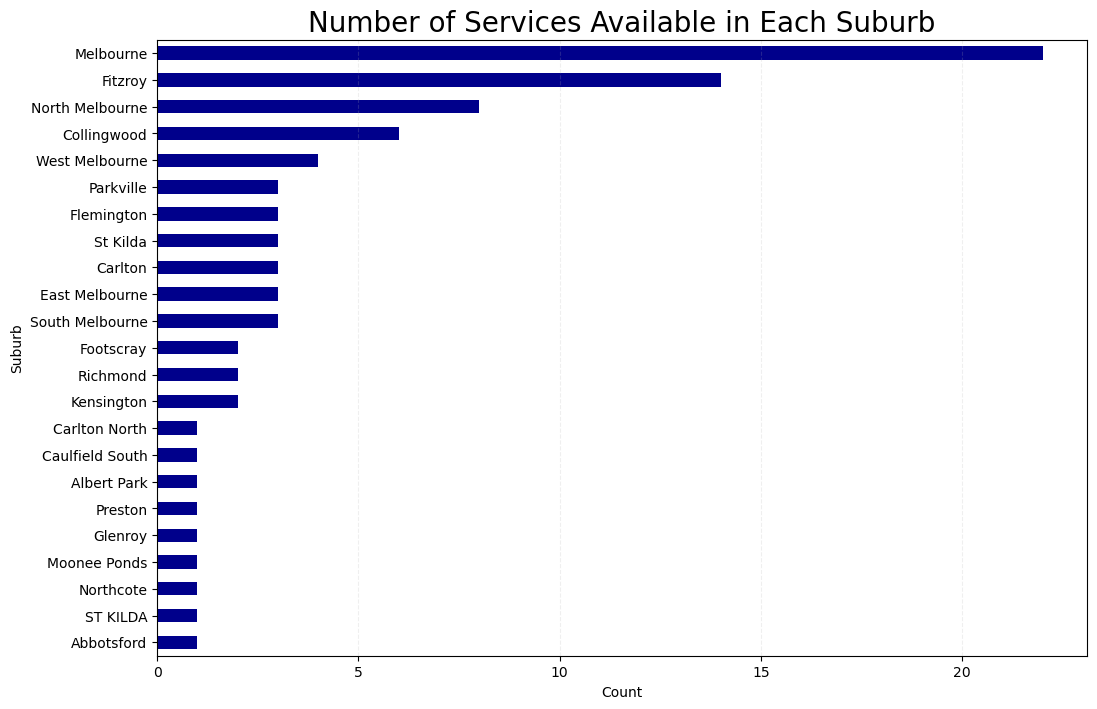

In [20]:
# Plotting all unique suburbs in 'category_1' with their counts and sorting in ascending order 
area = ho_df['suburb'].value_counts().sort_values(ascending = True)

# Create a horizontal bar chart
plt.figure(figsize=(12, 8))
area.plot(kind='barh', color='darkblue')
plt.xlabel('Count')
plt.ylabel('Suburb')
plt.title('Number of Services Available in Each Suburb', fontsize = 20)
plt.grid(axis='x', linestyle='--', alpha=0.2)  # Add grid lines

# Show the plot
plt.show()

Above chart shows that most services are available within the Melbourne City, with Fitzroy being the next suburb having second most support services. 

In [21]:
# Display all unique categories in 'category_1' with their counts
category_counts = ho_df['category_1'].value_counts()

# Print the unique categories with their counts
print("Unique categories in 'category_1' with their counts:")
for category, count in category_counts.items():
    print(f"{category}: {count}")


Unique categories in 'category_1' with their counts:
Food: 17
Accommodation: 14
Health Services / Pharmacy: 12
Legal / Financial Advice: 11
Hospitals / Emergency: 11
Counselling and Psychiatric Services: 8
Drug and Alcohol: 4
Travel Assistance: 2
Tenancy Assistance: 2
Helpful phone number: 2
Clothes and Blankets: 1
Employment Assistance: 1
Needle Exchange: 1
Showers / Laundry: 1


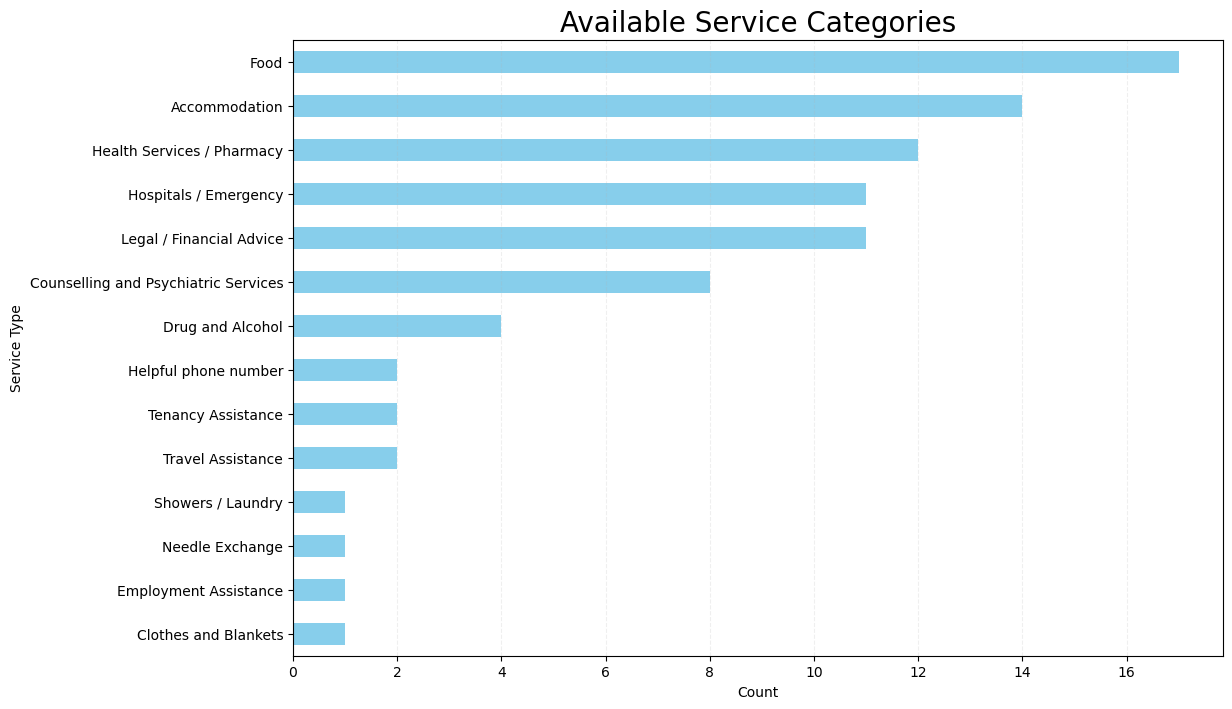

In [22]:
# Count occurrences of each Service Type in 'category_1' sorting in ascending order
category_counts = ho_df['category_1'].value_counts().sort_values(ascending=True)

# Create a horizontal bar chart
plt.figure(figsize=(12, 8))
category_counts.plot(kind='barh', color='skyblue')
plt.xlabel('Count')
plt.ylabel('Service Type')
plt.title('Available Service Categories', fontsize = 20)
plt.grid(axis='x', linestyle='--', alpha=0.2)  # Add grid lines 

# Show the plot
plt.show()

The two categories with the most support services available are food and accommodation, with 17 and 14 respectively. 

In [23]:
# Create interactive folium map visualising services categories in Melb
# Markers to provide information such as opening hours and phone number of each service   

# Function to define colors for each category
category_colors = {
    'Food': '#FF4500',  # Orange red
    'Accommodation': '#FF6347',  # Tomato red
    'Health Services / Pharmacy': '#00CED1',  # Dark turquoise
    'Legal / Financial Advice': '#8B4513',  # Saddle brown
    'Hospitals / Emergency': '#FF1493',  # Deep pink
    'Counselling and Psychiatric Services': '#1E90FF',  # Dodger blue
    'Drug and Alcohol': '#8A2BE2',  # Blue violet
    'Travel Assistance': '#F5DEB3',  # Wheat
    'Tenancy Assistance': '#B22222',  # Firebrick
    'Helpful phone number': '#6A5ACD',  # Slate blue
    'Clothes and Blankets': '#32CD32',  # Lime green
    'Employment Assistance': '#FFA07A',  # Light salmon
    'Needle Exchange': '#4682B4',  # Steel blue
    'Showers / Laundry': '#FFB6C1'  # Light pink
}

# Function to create a map centered at a specific location
def create_map():
    return folium.Map(location=[-37.81534, 144.97215], zoom_start=13)  # Somewhere in Melbourne so the map is more centered

# Function to format opening hours
def format_hours(row):
    # Creating "hours" List - If value in each row is not NA then print out the value 
    hours = [ 
        f"Monday: {row['monday']}" if pd.notna(row['monday']) else "Monday: Time Not Available", 
        f"Tuesday: {row['tuesday']}" if pd.notna(row['tuesday']) else "Tuesday: Time Not Available",
        f"Wednesday: {row['wednesday']}" if pd.notna(row['wednesday']) else "Wednesday: Time Not Available",
        f"Thursday: {row['thursday']}" if pd.notna(row['thursday']) else "Thursday: Time Not Available",
        f"Friday: {row['friday']}" if pd.notna(row['friday']) else "Friday: Time Not Available",
        f"Saturday: {row['saturday']}" if pd.notna(row['saturday']) else "Saturday: Time Not Available",
        f"Sunday: {row['sunday']}" if pd.notna(row['sunday']) else "Sunday: Time Not Available",
        f"Public Holiday: {row['public_holidays']}" if pd.notna(row['public_holidays']) else "Public Holiday: Time Not Available"
    ]
    return "<br>".join(hours)

# Function to add markers to the map
def add_markers(data, map_obj):
    for index, row in data.iterrows():
        name = row['name']
        phone = row['phone']
        latitude = row['latitude']
        longitude = row['longitude']
        category = row['category_1']
        hours_info = format_hours(row)  # Get formatted opening hours
        tooltip_text = f'<b>Name: {name}</b><br><b>Phone: {phone}</b><br>{hours_info}'  # Display name, phone, and hours in the tooltip
        
        # Obtain category colour from category_colours
        color = category_colors.get(category)  
        
        # Create a custom HTML marker using DivIcon
        html = f'<div style="background-color: {color}; width: 12px; height: 12px; border-radius: 50%; display: flex;"> </div>'
        icon = folium.DivIcon(html=html)
        
        # Use folium.DivIcon to create colored markers
        folium.Marker(
            [latitude, longitude], # Coordinates for the marker
            tooltip=tooltip_text, # Tooltip
            icon=icon # custom icon from above
        ).add_to(map_obj)

# Adding legend to the map
def add_legend(map_obj):
    
    # html defining what the legend would look like
    legend_html = '''
    <div style="
        position: absolute; 
        left: 450px; 
        width: 200px; 
        background: white; 
        border: 0.5px solid black; 
        z-index:9999; 
        font-size: 11px;  
        ">
        <b>Legend</b><br>
        <div style="display: flex; align-items: center;">
            <div style="background-color: #FF4500; width: 12px; height: 12px; border-radius: 50%;"></div> Food<br> 
        </div>
        <div style="display: flex; align-items: center;">
            <div style="background-color: #FF6347; width: 12px; height: 12px; border-radius: 50%;"></div> Accommodation<br>
        </div>
        <div style="display: flex; align-items: center;">
            <div style="background-color: #00CED1; width: 12px; height: 12px; border-radius: 50%;"></div> Health Services / Pharmacy<br>
        </div>
        <div style="display: flex; align-items: center;">
            <div style="background-color: #8B4513; width: 12px; height: 12px; border-radius: 50%;"></div> Legal / Financial Advice<br>
        </div>
        <div style="display: flex; align-items: center;">
            <div style="background-color: #FF1493; width: 12px; height: 12px; border-radius: 50%;"></div> Hospitals / Emergency<br>
        </div>
        <div style="display: flex; align-items: center;">
            <div style="background-color: #1E90FF; width: 12px; height: 12px; border-radius: 50%;"></div> Counselling and Psychiatric Services<br>
        </div>
        <div style="display: flex; align-items: center;">
            <div style="background-color: #8A2BE2; width: 12px; height: 12px; border-radius: 50%;"></div> Drug and Alcohol<br>
        </div>
        <div style="display: flex; align-items: center;">
            <div style="background-color: #F5DEB3; width: 12px; height: 12px; border-radius: 50%;"></div> Travel Assistance<br>
        </div>
        <div style="display: flex; align-items: center;">
            <div style="background-color: #B22222; width: 12px; height: 12px; border-radius: 50%;"></div> Tenancy Assistance<br>
        </div>
        <div style="display: flex; align-items: center;">
            <div style="background-color: #6A5ACD; width: 12px; height: 12px; border-radius: 50%;"></div> Helpful phone number<br>
        </div>
        <div style="display: flex; align-items: center;">
            <div style="background-color: #32CD32; width: 12px; height: 12px; border-radius: 50%;"></div> Clothes and Blankets<br>
        </div>
        <div style="display: flex; align-items: center;">
            <div style="background-color: #FFA07A; width: 12px; height: 12px; border-radius: 50%;"></div> Employment Assistance<br>
        </div>
        <div style="display: flex; align-items: center;">
            <div style="background-color: #4682B4; width: 12px; height: 12px; border-radius: 50%;"></div> Needle Exchange<br>
        </div>
        <div style="display: flex; align-items: center;">
            <div style="background-color: #FFB6C1; width: 12px; height: 12px; border-radius: 50%;"></div> Showers / Laundry<br>
        </div>
    </div>
    '''
    folium.Marker(
        location=[-37.81534, 144.97215],  # Where the legend would be placed
        icon=folium.DivIcon(html=legend_html)
    ).add_to(map_obj)

# Function to update the map based on selected filters
def update_map(category):
    my_map = create_map()  # Create a new map instance
    
    # Filter data based on selected category
    if category == 'All Categories':
        filtered_data = ho_df
    else:
        filtered_data = ho_df[ho_df['category_1'] == category]
    
    add_markers(filtered_data, my_map)
    add_legend(my_map)
    folium.plugins.MousePosition().add_to(my_map)
    display(my_map)

# Sorting the categories from a-z
sorted_categories = sorted(ho_df['category_1'].dropna().unique())

# Create dropdown widget for categories
categories_dropdown = widgets.Dropdown(
    options=['All Categories'] + sorted_categories,
    description='Category:',
    disabled=False,
    layout={'width': '25%'}
)

categories_dropdown.style.description_width = '60px'

# Use interact to create the interactive plot
widgets.interactive(update_map, category=categories_dropdown)  


interactive(children=(Dropdown(description='Category:', layout=Layout(width='25%'), options=('All Categories',…

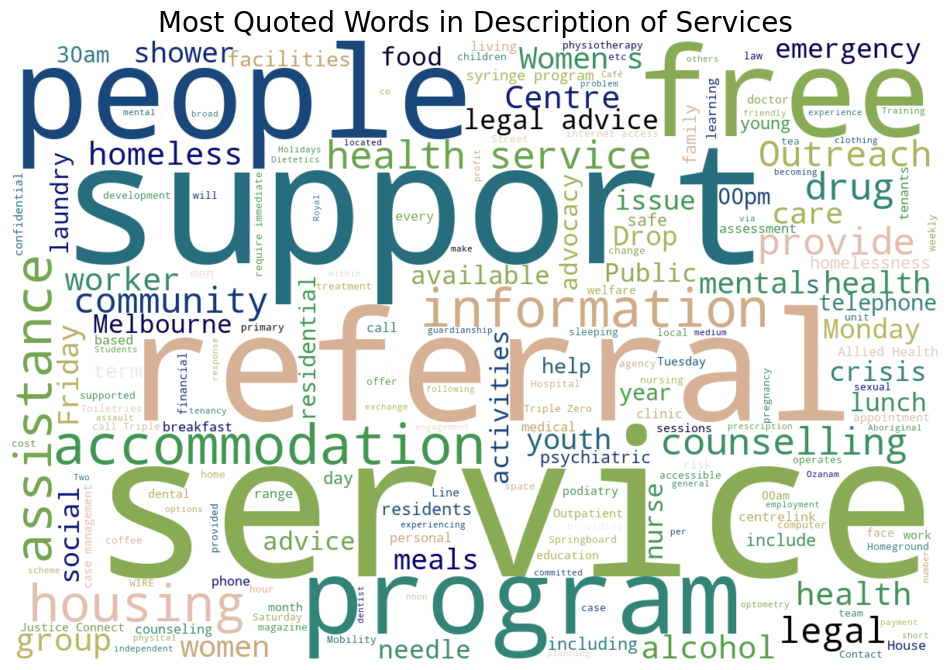

In [24]:
# WordCloud chart - an alternative way to display the most quoted word in the "what" column indicating services which may be available

# Extract text from the 'what' column, dropping na and adding to list 
what_entries = ho_df["what"].dropna().tolist()

# Concatenate all text entries into a single string with words separated by spaces
services = " ".join(what_entries)

# Create a WordCloud instance with specified dimensions, color scheme, and stop words
wordcloud = WordCloud(width=1200, 
                      height=800, 
                      background_color='white',
                      colormap='gist_earth')  

# Generate the word cloud from the concatenated text string
wordcloud.generate(services)

# Display the word cloud
plt.figure(figsize=(12, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")  # Hide axes for better visualization
plt.title('Most Quoted Words in Description of Services', fontsize = 20)  
plt.show()


<p style="font-weight: bold; font-size: 1.2em;"><a calss="anchor" id="part8">Part 8 - Food Services Available in Melbourne City and Exploring Indicator Relating to Food Security</p></a>

In [25]:
# Create the food_indicator dataset by filtering rows containing "food" in the indicator_label column
fs_indicator = fm_df[fm_df['indicator_label'].str.contains('food', case=False, na=False)]
fs_indicator = fs_indicator.reset_index(drop=True)

# Display the resulting dataset
fs_indicator


,indicator_label,indicator_description,unit,2012,2013,2014,2015,2016,population,source
0,Total Food insecurity (18-35 yrs),People who experienced food insecurity in the ...,%,12.0,11.5,11.0,13.5,12.6,Residents,Future Melbourne Social Survey
1,Total Food insecurity (36 yrs and over),People who experienced food insecurity in the ...,%,6.5,4.5,9.0,4.7,6.7,Residents,Future Melbourne Social Survey
2,Food security - running out (18-35 yrs),People Who ran out of Food in the Last 12 Mont...,%,5.5,4.3,3.3,4.3,2.9,Residents,Future Melbourne Social Survey
3,Food security - running out (36 yrs and over),People Who ran out of Food in the Last 12 Mont...,%,3.5,1.4,3.2,1.4,2.6,Residents,Future Melbourne Social Survey
4,Food security - eating less (Male),People who skipped meals or ate less in the la...,%,5.0,5.0,4.5,3.5,3.3,Residents,Future Melbourne Social Survey
5,Food security - eating less (18-35 yrs),People who skipped meals or ate less in the la...,%,6.0,5.9,6.1,7.0,6.3,Residents,Future Melbourne Social Survey
6,Food Growing (Female),"People who grow herbs, fruits or vegetables",%,NaN,NaN,59.0,46.5,55.5,Residents,Future Melbourne Social Survey
7,Food Growing (18-35 yrs),"People who grow herbs, fruits or vegetables",%,NaN,NaN,45.0,38.4,36.4,Residents,Future Melbourne Social Survey
8,Food Producing,People who produce some of their own food (gro...,%,NaN,NaN,59.8,58.3,54.8,Residents,Future Melbourne Social Survey
9,Total Food insecurity,People who experienced food insecurity in the ...,%,9.3,8.0,10.0,8.8,9.8,Residents,Future Melbourne Social Survey


As some of these indicators have included growing and producing, these will be removed. 

In [26]:
# Filter to rows where the indicator_label does not contains "growing" or "producing"
fs = fs_indicator[~fs_indicator['indicator_label'].str.contains('growing|producing', case=False)]
fs = fs.reset_index(drop=True)

# Display the resulting dataset
fs


,indicator_label,indicator_description,unit,2012,2013,2014,2015,2016,population,source
0,Total Food insecurity (18-35 yrs),People who experienced food insecurity in the ...,%,12.0,11.5,11.0,13.5,12.6,Residents,Future Melbourne Social Survey
1,Total Food insecurity (36 yrs and over),People who experienced food insecurity in the ...,%,6.5,4.5,9.0,4.7,6.7,Residents,Future Melbourne Social Survey
2,Food security - running out (18-35 yrs),People Who ran out of Food in the Last 12 Mont...,%,5.5,4.3,3.3,4.3,2.9,Residents,Future Melbourne Social Survey
3,Food security - running out (36 yrs and over),People Who ran out of Food in the Last 12 Mont...,%,3.5,1.4,3.2,1.4,2.6,Residents,Future Melbourne Social Survey
4,Food security - eating less (Male),People who skipped meals or ate less in the la...,%,5.0,5.0,4.5,3.5,3.3,Residents,Future Melbourne Social Survey
5,Food security - eating less (18-35 yrs),People who skipped meals or ate less in the la...,%,6.0,5.9,6.1,7.0,6.3,Residents,Future Melbourne Social Survey
6,Total Food insecurity,People who experienced food insecurity in the ...,%,9.3,8.0,10.0,8.8,9.8,Residents,Future Melbourne Social Survey
7,Food security - running out (Male),People Who ran out of Food in the Last 12 Mont...,%,5.5,3.0,2.5,2.5,3.3,Residents,Future Melbourne Social Survey
8,Food security - running out (Female),People Who ran out of Food in the Last 12 Mont...,%,3.5,2.5,4.0,3.0,2.3,Residents,Future Melbourne Social Survey
9,Food security - eating less (Female),People who skipped meals or ate less in the la...,%,4.5,4.0,7.5,6.0,5.5,Residents,Future Melbourne Social Survey


Having identified the key indicators related to food insecurity in the City of Melbourne, we calculate the yearly mean to forecast future trends. By examining whether there is an increase or decrease in these indicators, we can better understand the evolving landscape of food insecurity. This analysis is crucial for strategic decision-making, as it helps determine whether there is a need to enhance or reduce food service assistance in various areas of Melbourne.

In [27]:
# Working out Yearly mean
year_columns = ['2012', '2013', '2014', '2015', '2016']
average_per_year = fs[year_columns].mean()

print("Average values per year, in percentage:")
average_per_year

Average values per year, in percentage:


2012    6.425
2013    5.290
2014    6.585
2015    5.525
2016    6.170
dtype: float64

Best ARIMA parameters: (2, 0, 0)

Forecasted Values for the Next 10 Years:
2017: 6.01
2018: 5.66
2019: 6.41
2020: 5.48
2021: 6.35
2022: 5.75
2023: 5.93
2024: 6.20
2025: 5.58
2026: 6.38


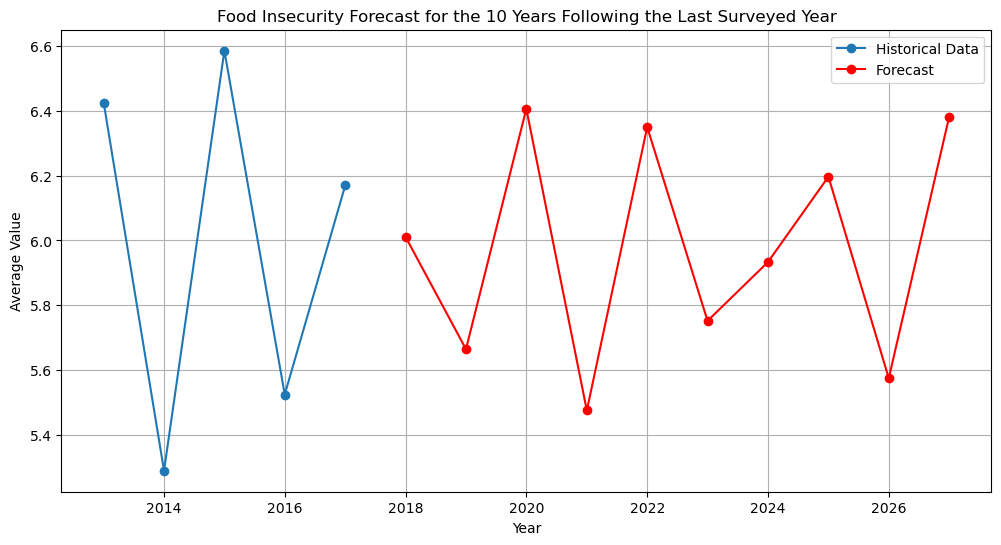

In [28]:
# Using Arima with gridSearch to find the best p d q to predict food security for 10 years with plot
warnings.filterwarnings('ignore')  # Ignore all warnings

# Prepare data 
data = average_per_year
data.index = pd.date_range(start='2012', periods=len(data), freq='A')

# Define parameter grid for ARIMA (p, d, q)
p = d = q = range(0, 3)  
pdq = list(product(p, d, q))

# Grid Search for ARIMA Parameters
def grid_search_arima(data, pdq):
    best_aic = np.inf  # Initialising positive infinity
    best_pdq = None
    best_model = None

    for param in pdq:
        try:
            model = ARIMA(data, order=param)
            results = model.fit()
            aic = results.aic
            if aic < best_aic:
                best_aic = aic
                best_pdq = param
                best_model = results
        except Exception as e:
            print(f"Error with parameters {param}: {e}")
            continue

    return best_pdq, best_model

# Perform Grid Search and print
best_pdq, best_model = grid_search_arima(data, pdq)
print('Best ARIMA parameters:', best_pdq)

# Forecast the next 10 years using the best model
forecast_steps = 10
forecast = best_model.forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=data.index[-1] + pd.DateOffset(years=1), periods=forecast_steps, freq='A')

# Print forecasted values
print("\nForecasted Values for the Next 10 Years:")
for year, value in zip(forecast_index.year, forecast):
    print(f"{year}: {value:.2f}")

# Combine historical and forecasted data for plotting
plt.figure(figsize=(12, 6))
plt.plot(data.index, data, label='Historical Data', marker='o')
plt.plot(forecast_index, forecast, label='Forecast', color='red', marker='o')

# Plot formatting
plt.title('Food Insecurity Forecast for the 10 Years Following the Last Surveyed Year')
plt.xlabel('Year')
plt.ylabel('Average Value')
plt.legend()
plt.grid(True)
plt.show()

In [29]:
# Calculate evaluation metrics (MAE, MSE, RMSE)
actual_values = data.values[-5:]  # Use the last 5 years of actual values for comparison
predicted_values = best_model.fittedvalues[-5:]  # Use the fitted values from the ARIMA model

# Mean Absolute Error
mae = mean_absolute_error(actual_values, predicted_values)

# Mean Squared Error
mse = mean_squared_error(actual_values, predicted_values)

# Root Mean Squared Error
rmse = np.sqrt(mse)

# Print evaluation metrics
print("\nModel Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")



Model Evaluation Metrics:
Mean Absolute Error (MAE): 0.17
Mean Squared Error (MSE): 0.06
Root Mean Squared Error (RMSE): 0.24


Above result has shown that the error for predicting trends are relatively low.  Indicating the model's predictions are generally quite close to the actual values.  

<p style="font-weight: bold; font-size: 1.2em;"><a calss="anchor" id="part9">Part 9 - Conclusion </p></a>


With only 17 food services currently available in Melbourne and food insecurity projected to persist around the 6% mark, it is crucial for Melbourne to consider expanding and enhancing food services throughout the city. Ensuring adequate food access is not just a matter of convenience; it is essential for personal safety and security. Reliable access to food supports well-being, reduces stress, and fosters a safer, more resilient community. Addressing these needs proactively can make a significant difference in improving the quality of life for all residents.



<p style="font-weight: bold; font-size: 1.2em;"><a calss="anchor" id="part10">Part 10 - Limitation of this Analysis </p></a>

The analysis and forecast presented here come with several limitations. Notably, the model does not account for macroeconomic factors such as recent inflationary trends, the impacts of the COVID-19 pandemic, and other significant economic disruptions that have affected individuals' purchasing power and access to food. These factors could substantially affect the accuracy of forecasts and the overall understanding of food security trends. Regardless of these limitations, it is imperative for any city to have a robust system in place to ensure that all residents' basic needs are met. No one should ever feel that their essential needs, such as food, are not being adequately addressed.

<p style="font-weight: bold; font-size: 1.2em;"><a calss="anchor" id="part11">Part 11  - Reference </p></a>

https://data.melbourne.vic.gov.au/pages/home/

https://github.com/jupyter-widgets/ipywidgets/issues/3870<br>
https://towardsdatascience.com/interactive-data-analysis-with-dropdown-menu-ipywidgets-and-plotly-in-jupyter-notebook-591a84a81b22

https://www.datacamp.com/tutorial/wordcloud-python<br>
https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html<br>
https://www.topcoder.com/thrive/articles/word-cloud-in-python

https://realpython.com/python-folium-web-maps-from-data/<br>
https://towardsdatascience.com/creating-a-simple-map-with-folium-and-python-4c083abfff94<br>
https://www.kaggle.com/code/daveianhickey/how-to-folium-for-maps-heatmaps-time-data

https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/<br>
https://www.influxdata.com/blog/python-ARIMA-tutorial-influxDB/<br>
https://medium.com/datainc/time-series-analysis-and-forecasting-with-arima-in-python-aa22694b3aaa<br>
https://ademos.people.uic.edu/Chapter23.html<br>
